In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from statsmodels.graphics.tsaplots import plot_predict
from scipy import stats
from scipy.stats import norm, skew
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import Holt
import itertools
from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("database.csv")
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [3]:
print('Shape of the file')
print('-'*30)
print(df.shape)

Shape of the file
------------------------------
(23412, 21)


In [4]:
def msv1(data, thresh=30, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5,
             f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
             ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5,
             f'Columns with less than {thresh} missing values', fontsize=12, color='green',
             ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    
    return plt.show()

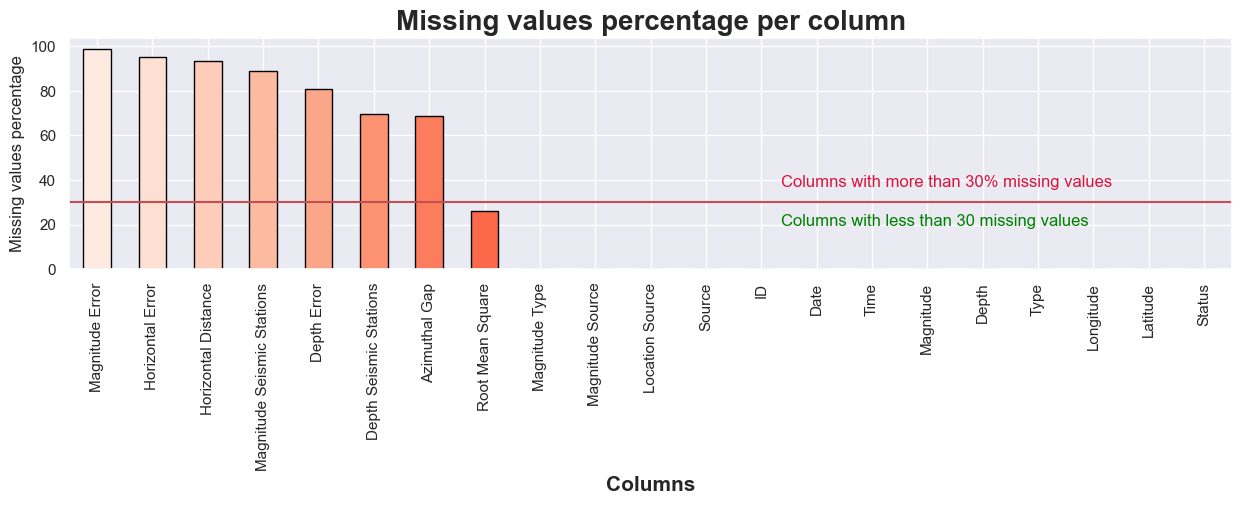

In [5]:
msv1(df, 30, color=sns.color_palette('Reds',15))

In [6]:
df = df.dropna(thresh=len(df)*0.70, axis=1)

In [7]:
col_with_NaN_value = df.columns[df.isnull().any()]
df_nan = df[col_with_NaN_value]
print('Number of NaN values')
print('-'*30)
df_nan.isnull().sum()

Number of NaN values
------------------------------


Magnitude Type         3
Root Mean Square    6060
dtype: int64

In [11]:
df = df.dropna(subset=['Magnitude Type'])

df['Root Mean Square'] = df['Root Mean Square'].fillna(value=df['Root Mean Square'].mean())

df = df.reset_index()

In [12]:
df.isnull().sum()

level_0             0
index               0
Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [13]:
df.dtypes

level_0               int64
index                 int64
Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
Magnitude Type       object
Root Mean Square    float64
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

In [14]:
lengths = df["Date"].str.len()
lengths.value_counts()

Date
10    23406
24        3
Name: count, dtype: int64

In [15]:
wrongdates = np.where([lengths == 24])[1]
print("Row index with wrong dates:", wrongdates)
df.loc[wrongdates]

Row index with wrong dates: [ 3378  7510 20647]


,level_0,index,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,3378,3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed
7510,7510,7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed
20647,20647,20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed


In [16]:
df.loc[3378, "Date"] = "02/23/1975"  
df.loc[7510, "Date"] = "04/28/1985"
df.loc[20647, "Date"] = "03/13/2011"

df.loc[3378, "Time"] = "02:58:41"  
df.loc[7510, "Time"] = "02:53:41"
df.loc[20647, "Time"] = "02:23:34"

In [17]:
lengths = df["Time"].str.len()
lengths.value_counts()

Time
8    23409
Name: count, dtype: int64

In [18]:
df['datetime'] = df.Date+' '+df.Time
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M:%S')

df = df.drop(['Date','Time','index'], axis=1)

In [19]:
print('Type: ', df['Type'].unique(), "\n")
print('Magnitude Type', df['Magnitude Type'].unique(), "\n")
print('Source', df['Source'].unique(), "\n")
print('Location Source', df['Location Source'].unique(), "\n")          
print('Magnitude Source', df['Magnitude Source'].unique(), "\n")
print('Status', df['Status'].unique(), "\n")

Type:  ['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst'] 

Magnitude Type ['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' 'MWB' 'MWW' 'MWR'] 

Source ['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'NN' 'SE' 'AK'
 'PR'] 

Location Source ['ISCGEM' 'CI' 'US' 'H' 'U' 'G' 'NC' 'B' 'GCMT' 'AG' 'UW' 'SPE' 'HVO'
 'BRK' 'AGS' 'PGC' 'BOU' 'SLC' 'OTT' 'AEI' 'AEIC' 'CASC' 'ISK' 'ATH' 'THE'
 'ROM' 'MDD' 'WEL' 'GUC' 'UNM' 'CSEM' 'RSPR' 'JMA' 'NN' 'CAR' 'SJA' 'TEH'
 'BEO' 'UCR' 'SE' 'TUL' 'TAP' 'THR' 'LIM' 'US_WEL' 'AK' 'PR'] 

Magnitude Source ['ISCGEM' 'OFFICIAL' 'CI' 'US' '1020' 'BRK' 'NC' '1000' 'GCMT' '1009' 'UW'
 '1023' 'HRV' 'PAR' 'NIED' 'NN' 'SE' 'PGC' 'US_GCMT' 'US_PGC' 'AK' 'PR'
 'GUC'] 

Status ['Automatic' 'Reviewed'] 



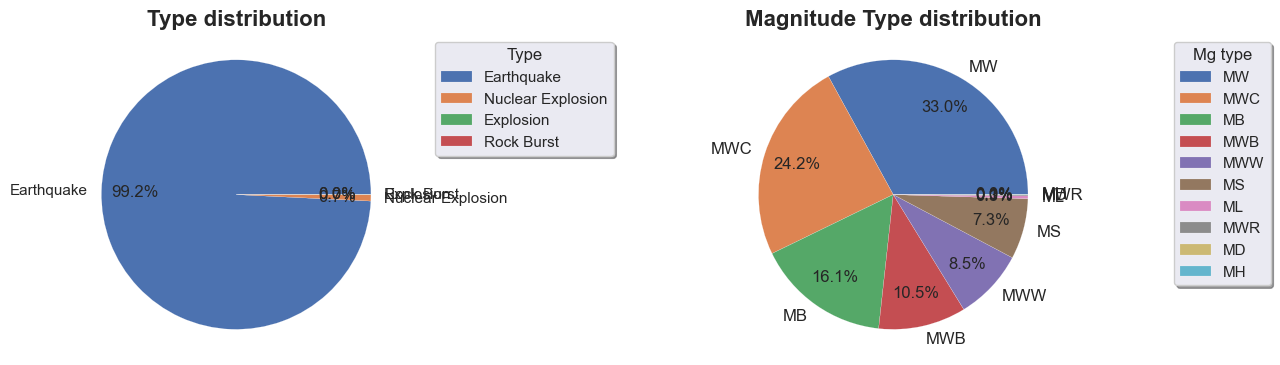

In [20]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1=df['Type'].value_counts(normalize=True).plot.pie(
    legend=False, pctdistance=0.75, radius=1.05,
    autopct='%1.1f%%' , wedgeprops = {'linewidth': 0.1},
    normalize=False)
ax1.set_title('Type distribution', fontsize=16, weight='bold')
ax1.legend(fancybox=True, shadow=True, title='Type',
           fontsize=11,loc='upper right', bbox_to_anchor=(1.7, 1))
ax1.set_ylabel("")

ax2 = fig.add_subplot(2,2,2)
ax2=df['Magnitude Type'].value_counts(normalize=True).plot.pie(
    legend=False, autopct='%1.1f%%' ,
    pctdistance=0.75, radius=1.05, wedgeprops = {'linewidth': 0.1},
    textprops = {'fontsize': 12},normalize=False)

ax2.set_title('Magnitude Type distribution', fontsize=16, weight='bold')
ax2.legend(fancybox=True, shadow=True, title='Mg type',
           fontsize=11,loc='upper right', bbox_to_anchor=(1.7, 1))
ax2.set_ylabel("")

plt.show()

In [21]:
df = df[df['Type']=='Earthquake']

In [22]:
df

,level_0,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,datetime
0,0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,23404,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23405,23405,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23406,23406,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23407,23407,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


In [23]:
tmp = df['datetime']
df.drop('datetime', axis = 1, inplace = True)
df.index = tmp
df

,level_0,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
datetime,,,,,,,,,,,,,
1965-01-02 13:44:18,0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04 11:29:49,1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05 18:05:58,2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08 18:49:43,3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09 13:32:50,4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28 08:22:12,23404,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
2016-12-28 09:13:47,23405,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
2016-12-28 12:38:51,23406,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed


In [24]:
df.index

DatetimeIndex(['1965-01-02 13:44:18', '1965-01-04 11:29:49',
               '1965-01-05 18:05:58', '1965-01-08 18:49:43',
               '1965-01-09 13:32:50', '1965-01-10 13:36:32',
               '1965-01-12 13:32:25', '1965-01-15 23:17:42',
               '1965-01-16 11:32:37', '1965-01-17 10:43:17',
               ...
               '2016-12-24 03:58:55', '2016-12-25 14:22:27',
               '2016-12-25 14:32:13', '2016-12-27 23:20:56',
               '2016-12-28 08:18:01', '2016-12-28 08:22:12',
               '2016-12-28 09:13:47', '2016-12-28 12:38:51',
               '2016-12-29 22:30:19', '2016-12-30 20:08:28'],
              dtype='datetime64[ns]', name='datetime', length=23229, freq=None)

# Time series modeling

In [25]:
num_tmp = df.groupby(pd.Grouper(freq='Q')).count()

In [26]:
num_tmp

,level_0,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
datetime,,,,,,,,,,,,,
1965-03-31,105,105,105,105,105,105,105,105,105,105,105,105,105
1965-06-30,87,87,87,87,87,87,87,87,87,87,87,87,87
1965-09-30,83,83,83,83,83,83,83,83,83,83,83,83,83
1965-12-31,64,64,64,64,64,64,64,64,64,64,64,64,64
1966-03-31,62,62,62,62,62,62,62,62,62,62,62,62,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,107,107,107,107,107,107,107,107,107,107,107,107,107
2016-03-31,91,91,91,91,91,91,91,91,91,91,91,91,91
2016-06-30,128,128,128,128,128,128,128,128,128,128,128,128,128


In [27]:
num_tmp = num_tmp['Depth']
num_tmp.rename('Number of earthquakes', inplace = True)

datetime
1965-03-31    105
1965-06-30     87
1965-09-30     83
1965-12-31     64
1966-03-31     62
             ... 
2015-12-31    107
2016-03-31     91
2016-06-30    128
2016-09-30    117
2016-12-31    133
Freq: Q-DEC, Name: Number of earthquakes, Length: 208, dtype: int64

In [28]:
def tset_train_split(ser, n):
    return ser[:-n], ser[-n:]

In [29]:
train, test = tset_train_split(num_tmp, 20)
print(train.shape)
print(test.shape)

(188,)
(20,)


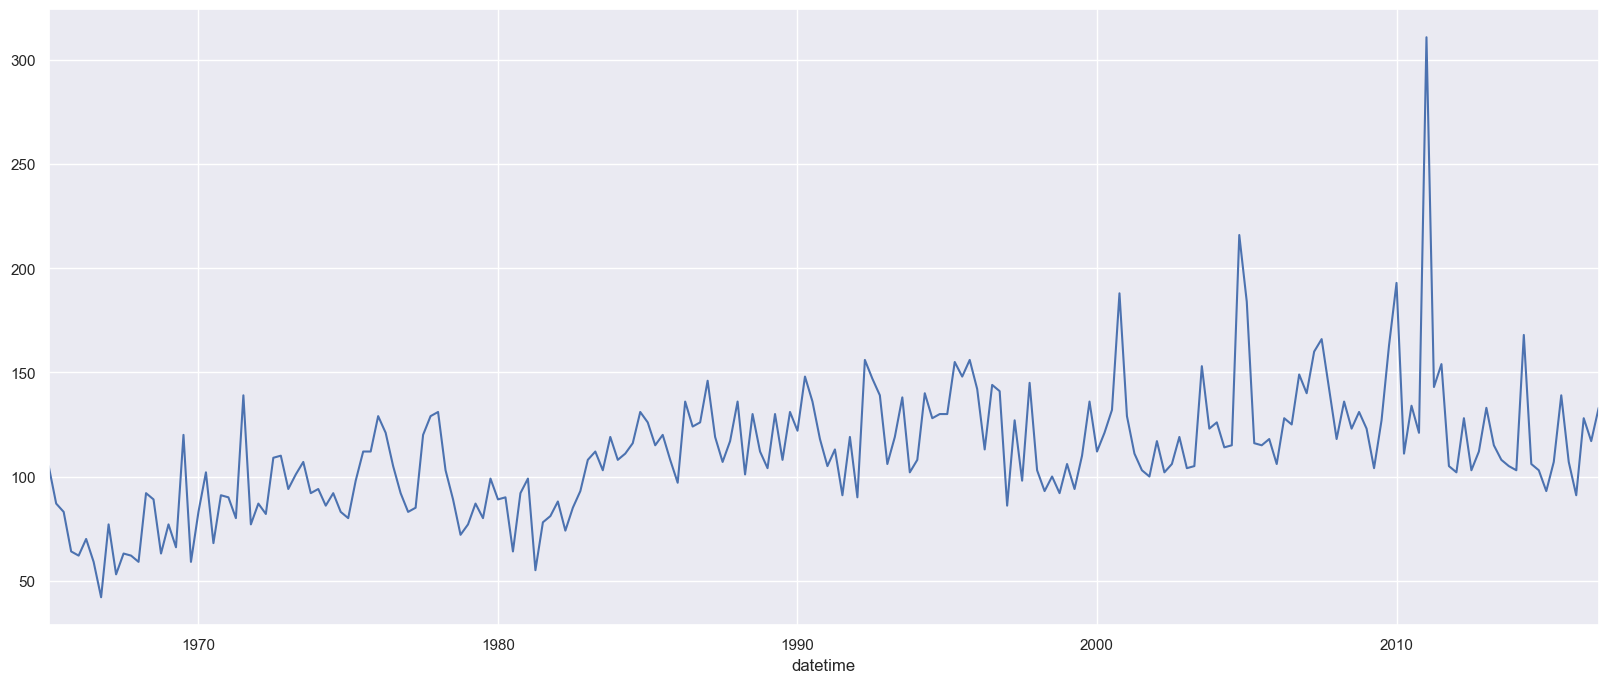

In [30]:
fig, ax = plt.subplots(figsize=(20, 8))

num_tmp.plot(ax=ax)
ax.grid(True)
plt.show()

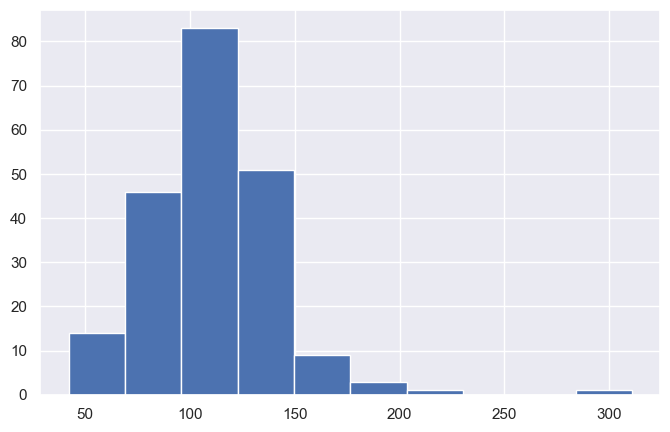

In [31]:
num_tmp.hist(figsize=(8, 5))

plt.show()

In [32]:
def decompose_ser(ser):
    decomposition = smt.seasonal_decompose(ser[~ser.isna()])
    fig = decomposition.plot()
    fig.set_size_inches(15, 10)
    plt.show()
    return decomposition

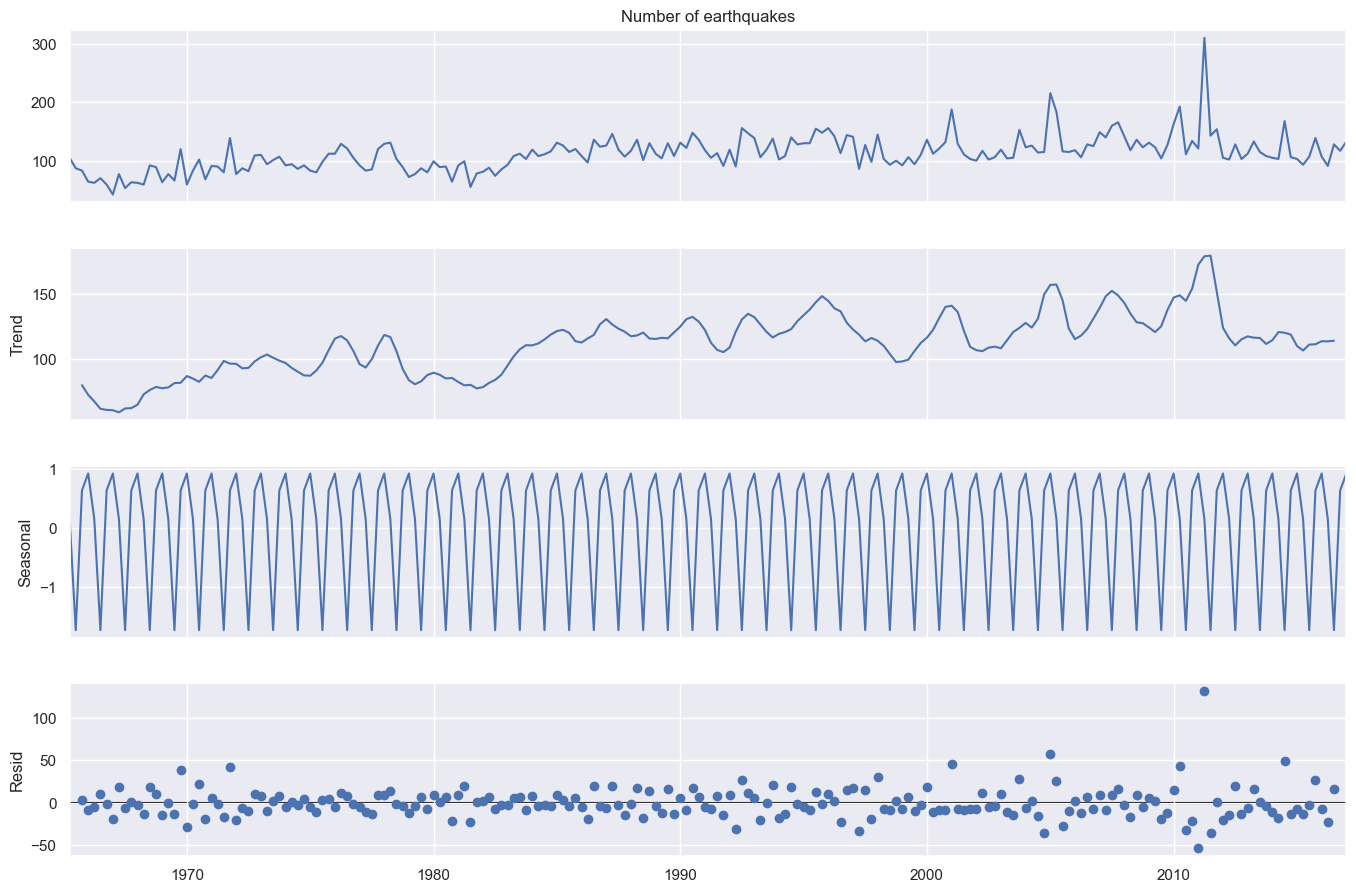

In [33]:
num_dec = decompose_ser(num_tmp)

In [34]:
def plot_autocorelation(ser):
    fig, ax = plt.subplots(2, figsize=(15, 10))
    ax[0] = plot_acf(ser, ax=ax[0], lags=100)
    ax[1] = plot_pacf(ser, ax=ax[1], lags=100)

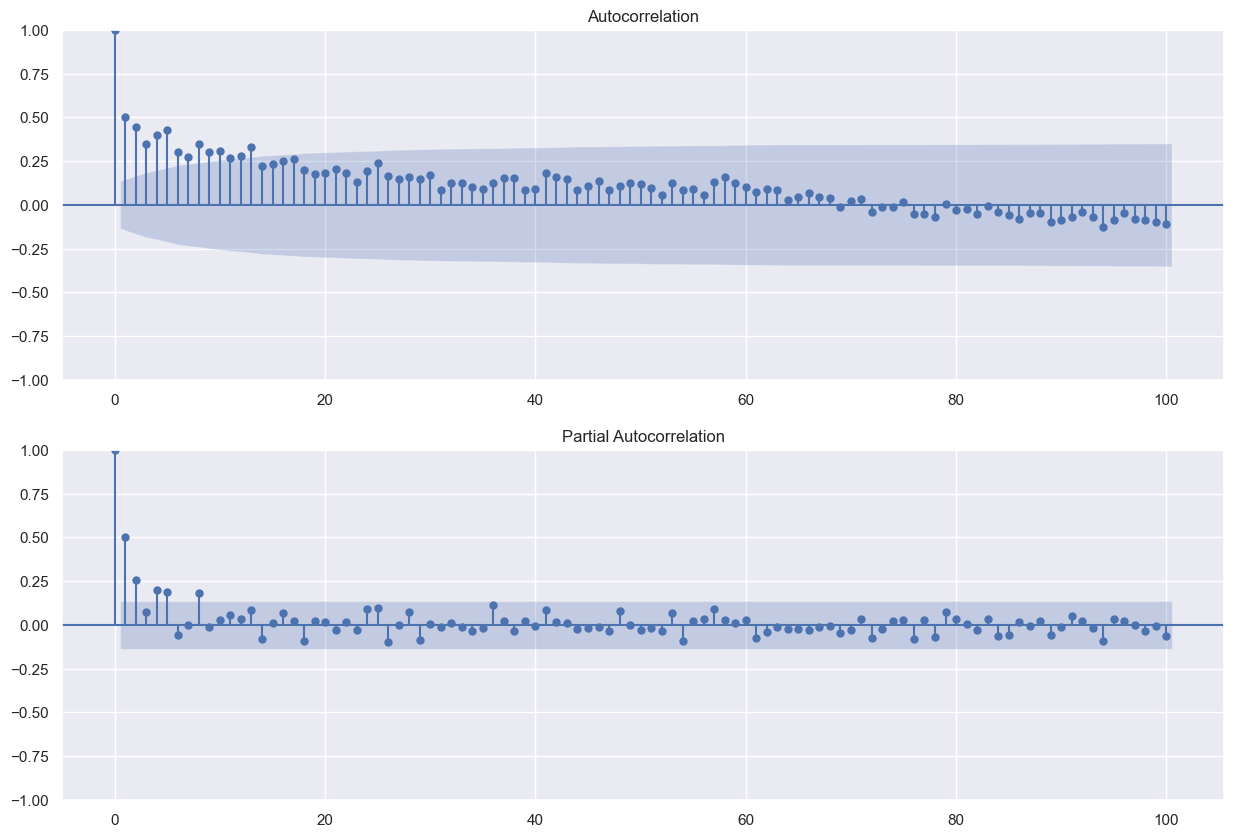

In [35]:
plot_autocorelation(num_tmp)

In [36]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('Наявні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

In [37]:
dickey_fuller_test(num_tmp[~num_tmp.isna()])

adf:  -2.837469625496546
p-value:  0.0531176171252844
Critical values:  {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}
Наявні одиничні корені, ряд не стаціонарний.


In [38]:
num_tmp_diff = num_tmp.diff(periods=1).dropna()

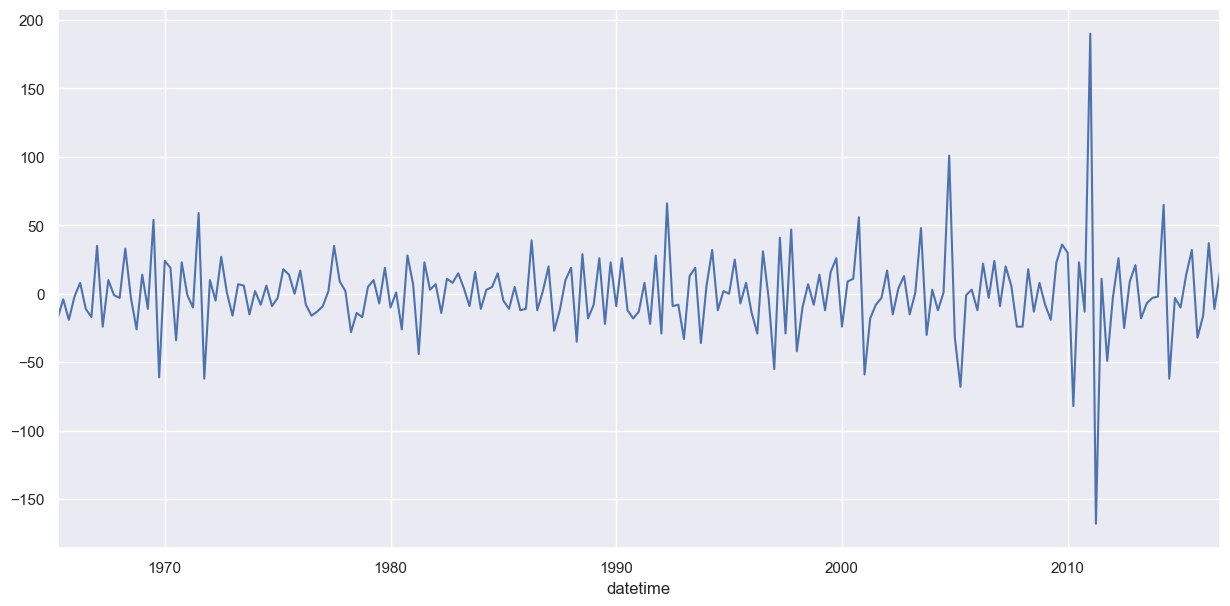

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))

num_tmp_diff.plot(ax=ax)

plt.show()

In [40]:
dickey_fuller_test(num_tmp_diff)

adf:  -9.01071129541032
p-value:  6.136745794385613e-15
Critical values:  {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}
Одиничні корені відсутні, ряд є стаціонарним.


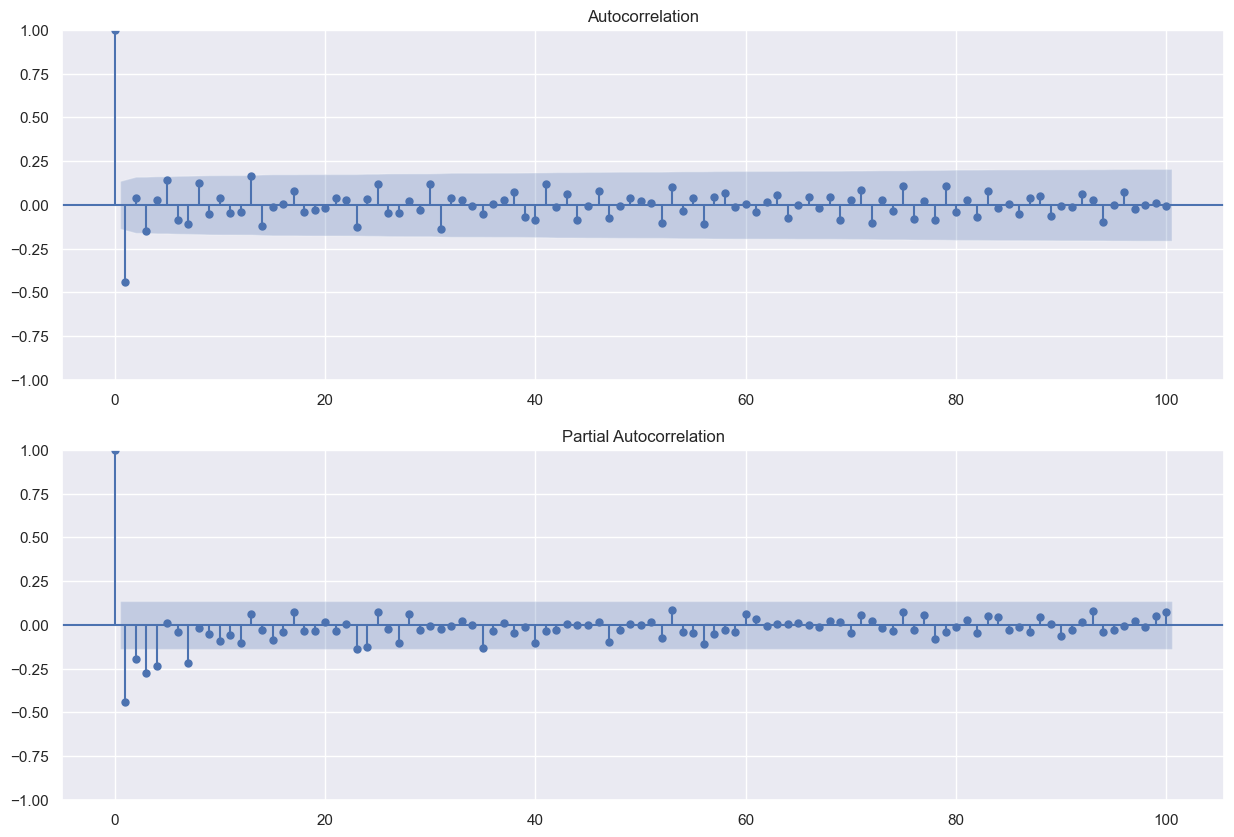

In [41]:
plot_autocorelation(num_tmp_diff)

# SARIMAX

In [42]:
import itertools

In [43]:
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [316]:
sarima_grid_search(num_tmp,4)

C:\Users\ROS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ROS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(0, 1, 1, 4) - AIC:1848.54877224528


In [44]:
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary())
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    pred = results.get_prediction(-pred_date, dynamic=False)
 
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} {}'.format(
        seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(color='black', legend=True, figsize=(14, 7))
    y_to_test.plot(color='green', legend=True, figsize=(14, 7))
    
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7),
                      color = 'red', linestyle='--')

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    plt.legend()
    plt.show()

    
    return (results)

                                      SARIMAX Results                                      
Dep. Variable:               Number of earthquakes   No. Observations:                  208
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 4)   Log Likelihood                -944.982
Date:                             Thu, 08 Jun 2023   AIC                           1897.965
Time:                                     23:07:02   BIC                           1911.118
Sample:                                 03-31-1965   HQIC                          1903.289
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4425      0.041    -10.709      0.000      -0.523      -0.362
ar.S.L4        0.0274      

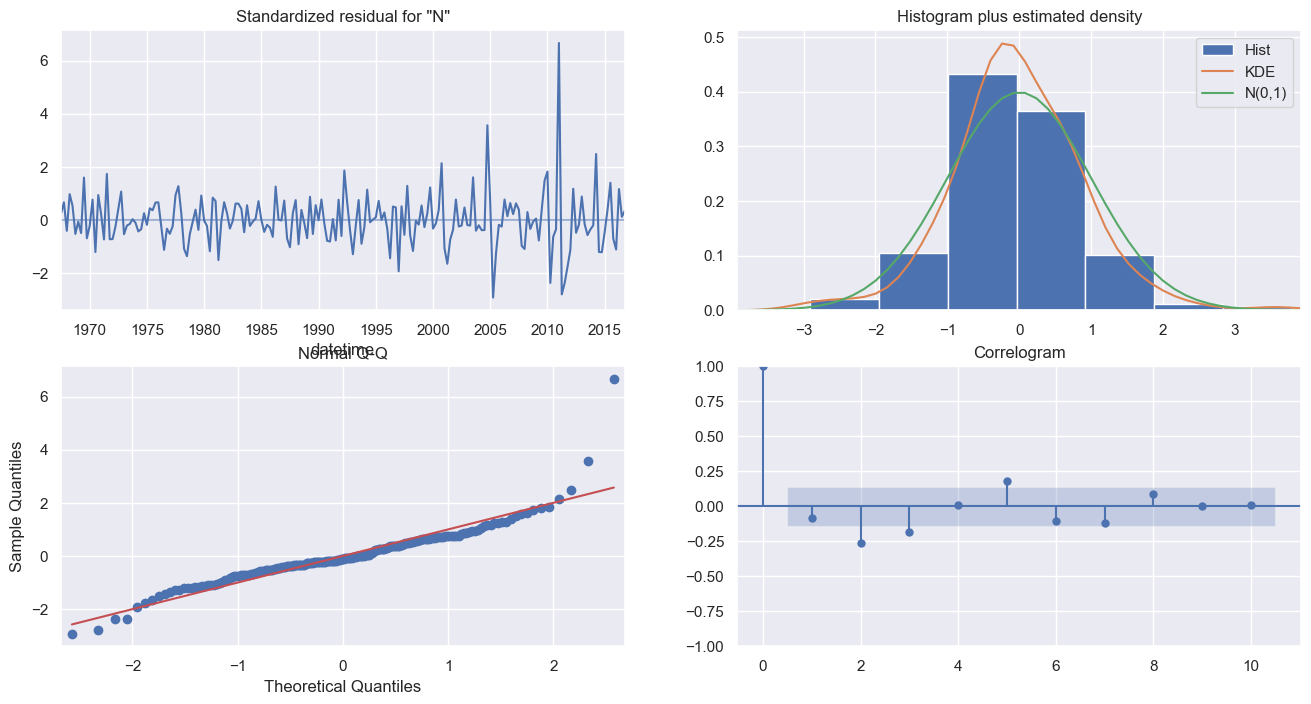

The Root Mean Squared Error of SARIMA with season_length=4 27.14


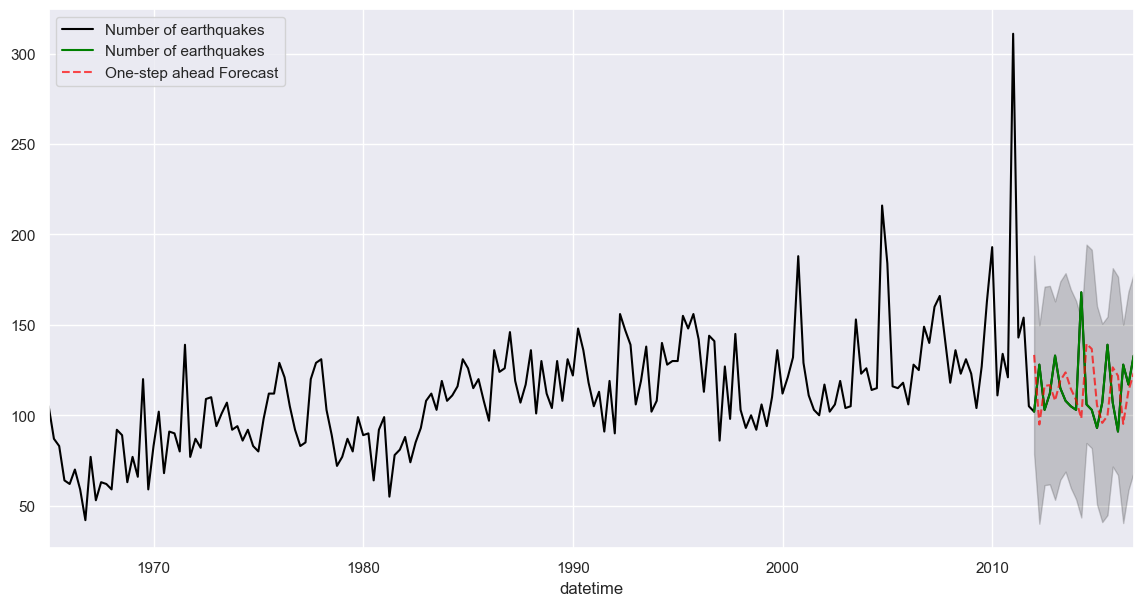

In [47]:
model = sarima_eva(num_tmp,(1, 1, 0),(1, 1, 1, 4),4, 20,num_tmp[-20:])

In [48]:
tmp = pd.date_range(start=num_tmp.index[-1], periods=9, freq='Q')
tmp

DatetimeIndex(['2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30',
               '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [49]:
final_table = model.forecast(8)
final_table.head()

2017-03-31    125.240346
2017-06-30    127.288977
2017-09-30    127.457213
2017-12-31    129.915777
2018-03-31    128.954732
Freq: Q-DEC, Name: predicted_mean, dtype: float64

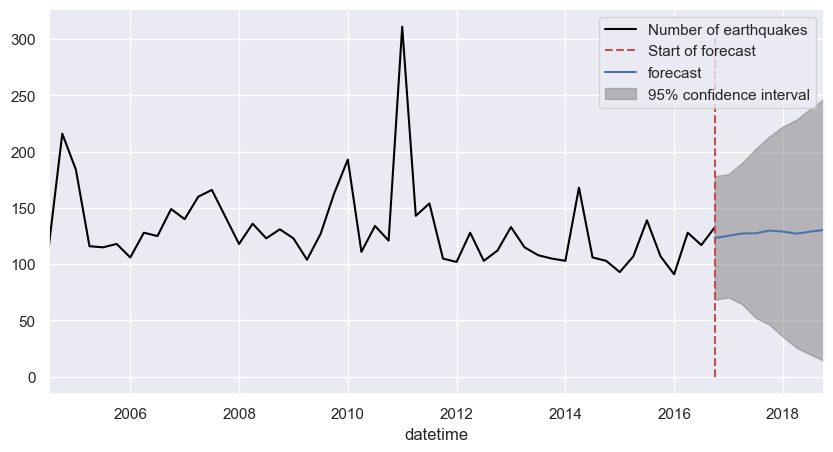

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
num_tmp[-50:].plot(ax=ax, color = 'black')
ax.vlines(num_tmp.index[-1], 0, 300, linestyle='--', color='r', label='Start of forecast')
ax = plot_predict(model, tmp[0], tmp[-1], ax=ax)

# Simple smoothing

In [51]:
from statsmodels.tsa.api import SimpleExpSmoothing 

In [52]:
def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y_to_train.plot(color='black', legend=True, figsize=(14, 7))
    y_to_test.plot(color='green', legend=True, figsize=(14, 7))
    ## оптимізація
    fit = SimpleExpSmoothing(y_to_train).fit()
    fcast = fit.forecast(predict_date).rename(r'$\alpha=%s$'%fit.model.params['smoothing_level'])
    # графік
    fcast.plot(color='red', legend=True)
    fit.fittedvalues.plot(color='red')
    mse = ((fcast - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with auto optimization is 39.98


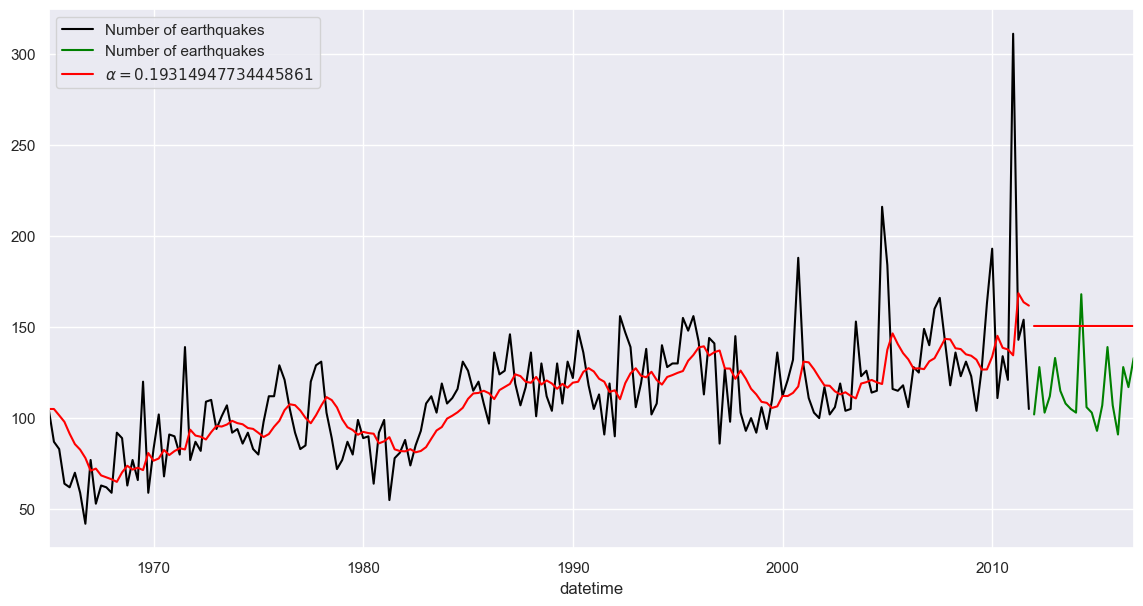

In [53]:
ses(num_tmp, train, test, 0.8, 20)

# Exp smoothing

In [54]:
from statsmodels.tsa.holtwinters import \
Holt, ExponentialSmoothing

In [55]:
def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y_to_train.plot(color='black', legend=True, figsize=(14, 7))
    y_to_test.plot(color='green', legend=True, figsize=(14, 7))
    # додавання
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit()
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped_trend=True).fit()
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='blue')
        fcast2.plot(style='--', color='blue', legend=True)
    #множення
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit()
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped_trend=True).fit()
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='blue')
        fcast4.plot(style='--', color='blue', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=4 44.58
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=4 and 40.52


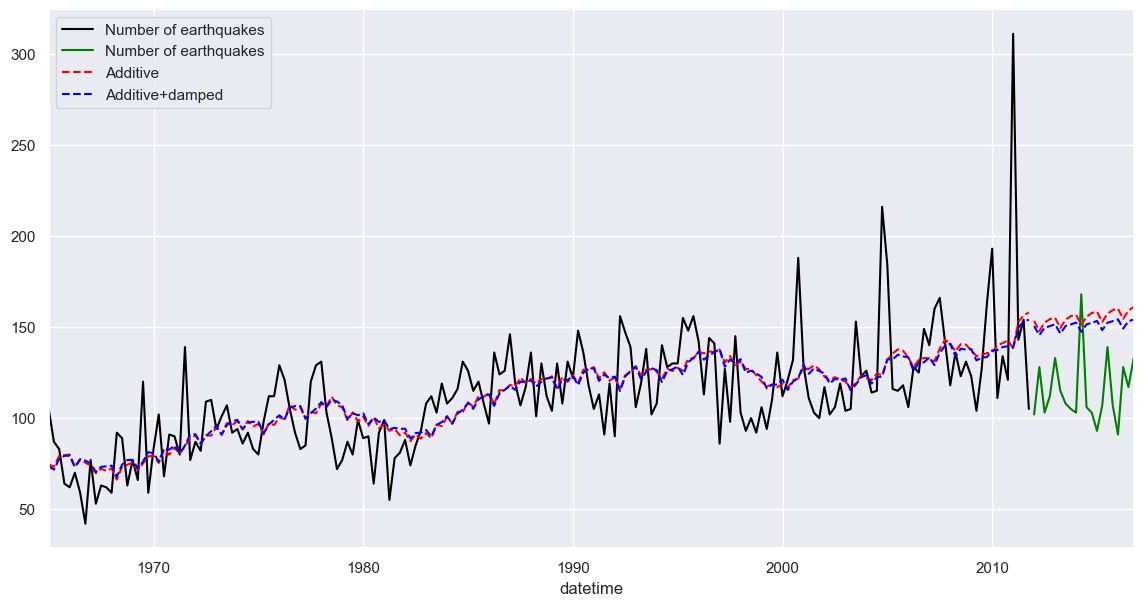

In [56]:
holt_win_sea(num_tmp, train, test,'additive', 4, 20)

The Root Mean Squared Error of additive trend, multiplicative seasonal of period season_length=4 and 44.33
The Root Mean Squared Error of additive damped trend, multiplicative seasonal of period season_length=4 and 44.33


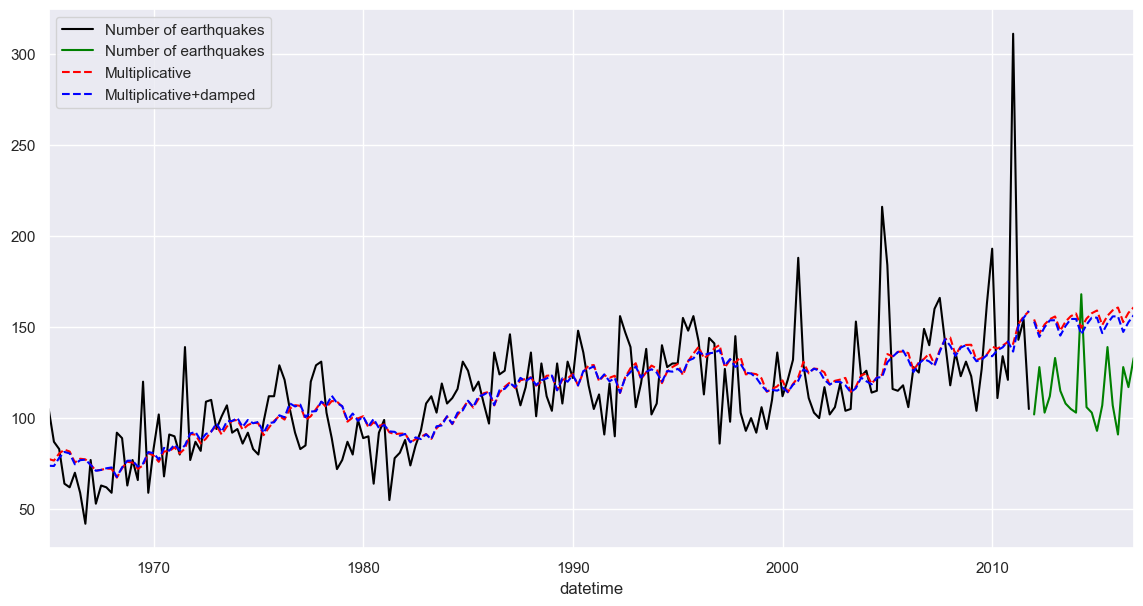

In [57]:
holt_win_sea(num_tmp, train, test,'multiplicative', 4, 20)

# HOLT

In [58]:
from statsmodels.tsa.holtwinters import Holt

In [59]:
def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y_to_train.plot(color='black', legend=True, figsize=(14, 7))
    y_to_test.plot(color='green', legend=True, figsize=(14, 7))
    
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(linestyle='--', color='blue')
    fcast1.plot(color='blue', legend=True)
    fit2.fittedvalues.plot(linestyle='--', color='red')
    fcast2.plot(color='red', legend=True)

    plt.show()


The Root Mean Squared Error of Holts Linear trend 107.18
The Root Mean Squared Error of Holts Exponential trend 23.84


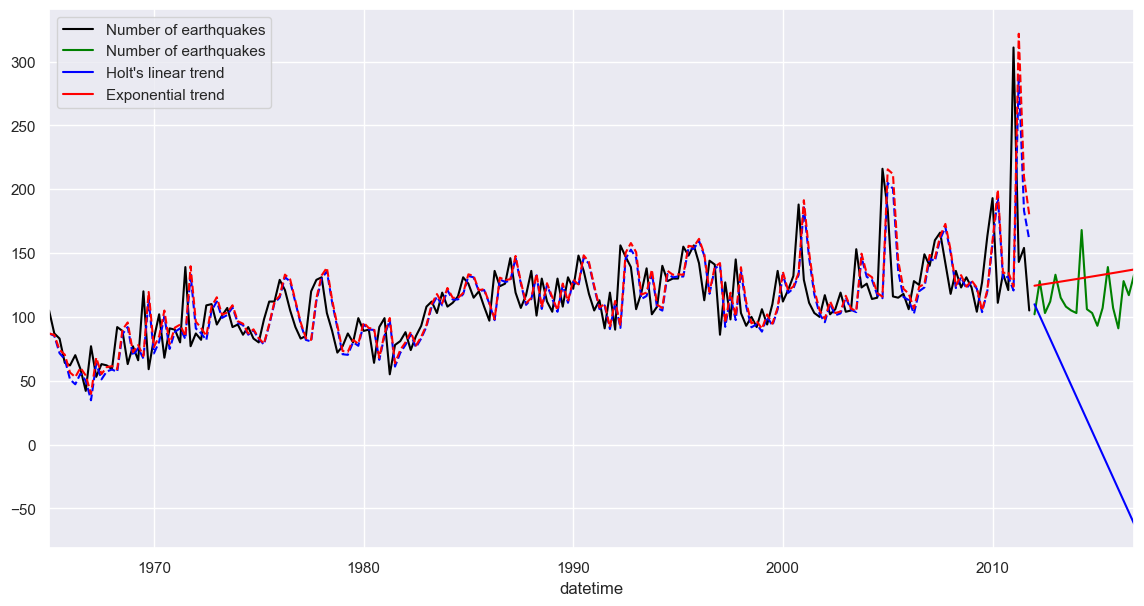

In [60]:
holt(num_tmp, num_tmp[:-20], num_tmp[-20:],0.75, 0.2, 20)